## Dataset Information

This is a standard supervised classification task. A classification problem where we have to predict whether a loan would be approved or not

| Variable           | Description                                       |
|--------------------|---------------------------------------------------|
| Loan_ID            | Unique Loan ID                                    |
| Gender             | Male/Female                                       |
| Married            | Applicant married (Y/N)                          |
| Dependents         | Number of dependents                             |
| Education          | Applicant Education (Graduate/Under Graduate)    |
| Self_Employed      | Self-employed (Y/N)                              |
| ApplicantIncome    | Applicant income                                  |
| CoapplicantIncome  | Coapplicant income                                |
| LoanAmount         | Loan amount in thousands                         |
| Loan_Amount_Term   | Term of loan in months                           |
| Credit_History     | Credit history meets guidelines                   |
| Property_Area      | Urban/Semi Urban/Rural                            |
| Loan_Status        | Loan approved (Y/N)                              |




## Import Modules

In [1]:
# Import the Dependencies
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# Specify the file path
adress = r'loan prediction.csv'

# Read the file using pandas
df = pd.read_csv(adress, header = 0, sep = ',')

# Print first five rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Check the number of rows & columns
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## PreProcessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [8]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Explatory Data Analysis

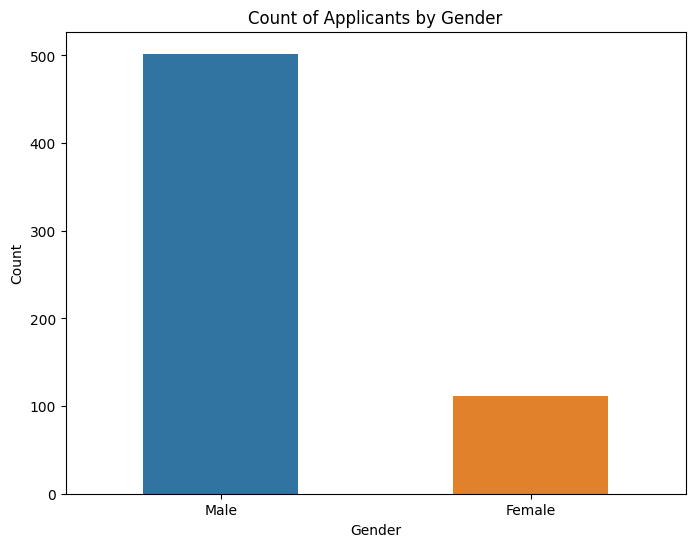

In [10]:
# Create a countplot for the 'Gender' variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', width = 0.5)

# Customize the plot
plt.title('Count of Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


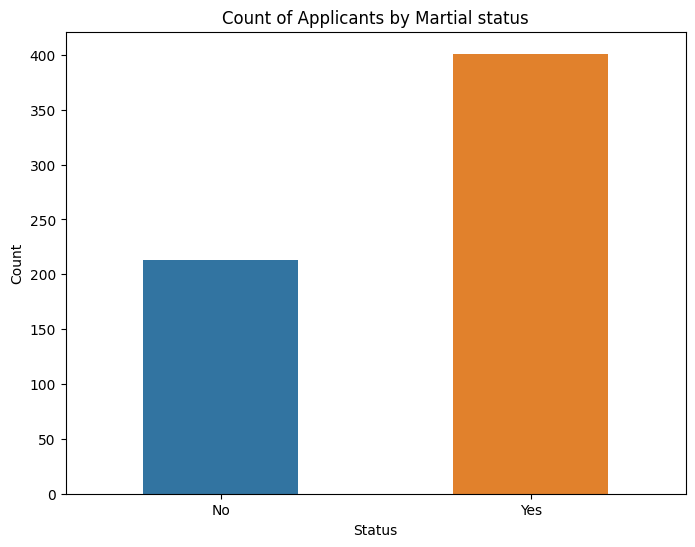

In [11]:
# Create a countplot for the 'Married' variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Married', width = 0.5)

# Customize the plot
plt.title('Count of Applicants by Martial status')
plt.xlabel('Status')
plt.ylabel('Count')

# Show the plot
plt.show()

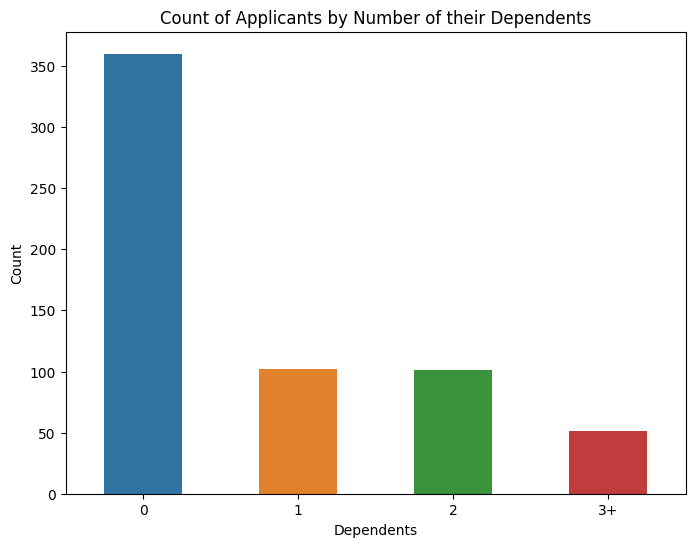

In [12]:
# Create a countplot for the 'Dependents' variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dependents', width = 0.5)

# Customize the plot
plt.title('Count of Applicants by Number of their Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')

# Show the plot
plt.show()

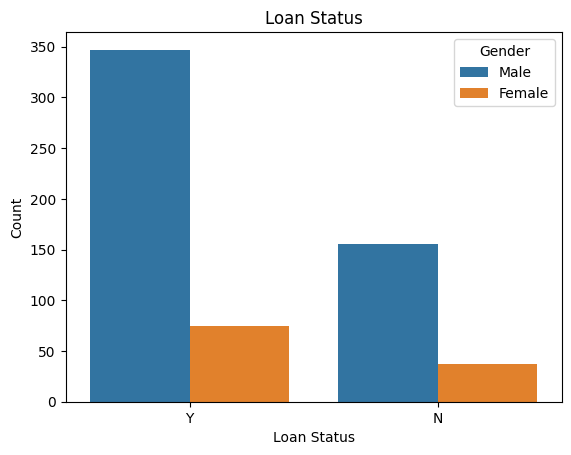

In [13]:
sns.countplot(x = 'Loan_Status', data = df, hue = 'Gender')
plt.title('Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

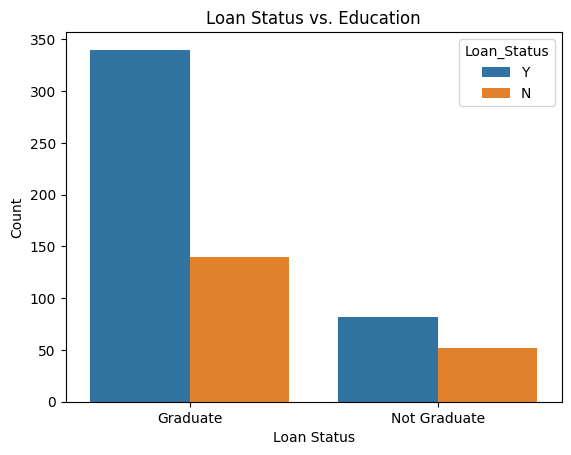

In [14]:
sns.countplot(x = 'Education', hue = 'Loan_Status', data = df)
plt.title('Loan Status vs. Education')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

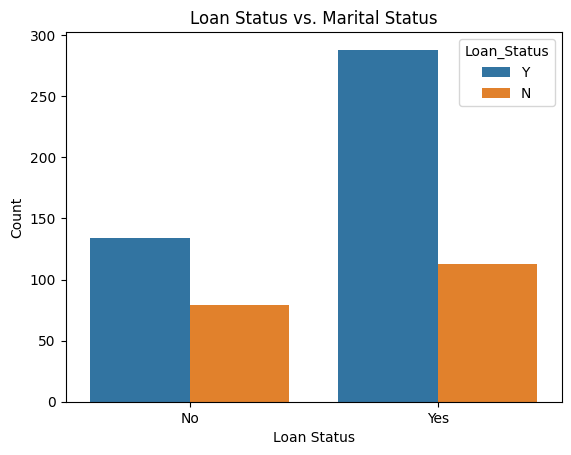

In [15]:
sns.countplot(x = 'Married', hue = 'Loan_Status', data = df)
plt.title('Loan Status vs. Marital Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

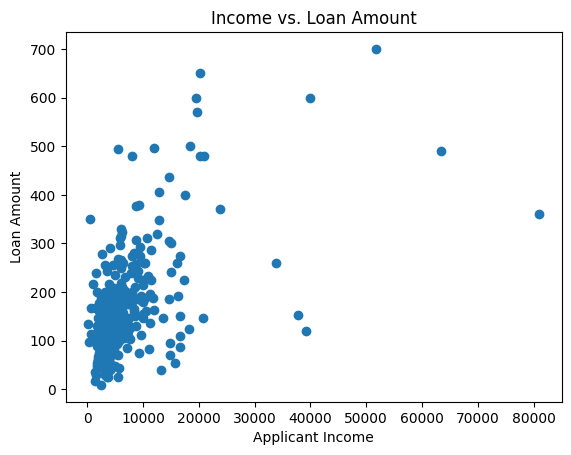

In [16]:
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.title('Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

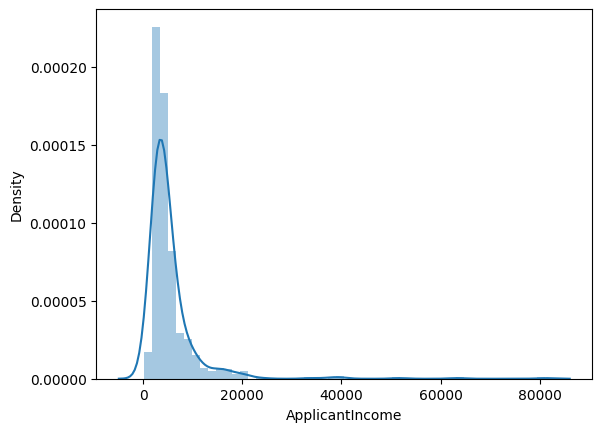

In [17]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

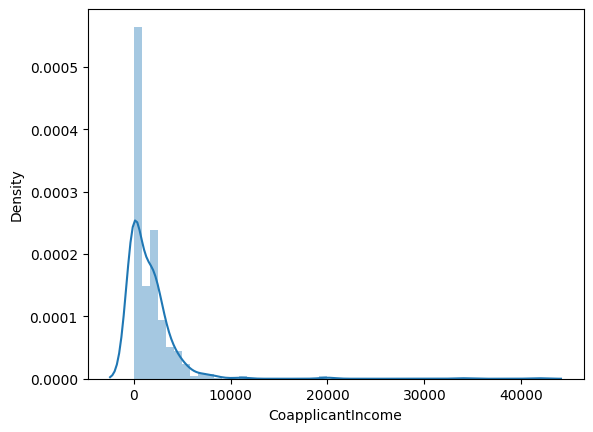

In [18]:
sns.distplot(df["CoapplicantIncome"])

<Axes: xlabel='LoanAmount', ylabel='Density'>

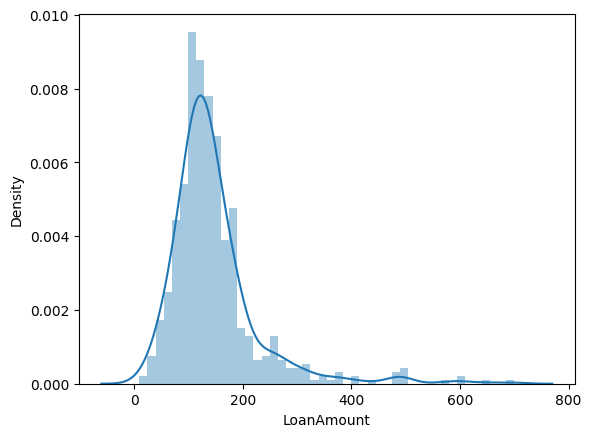

In [19]:
sns.distplot(df["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

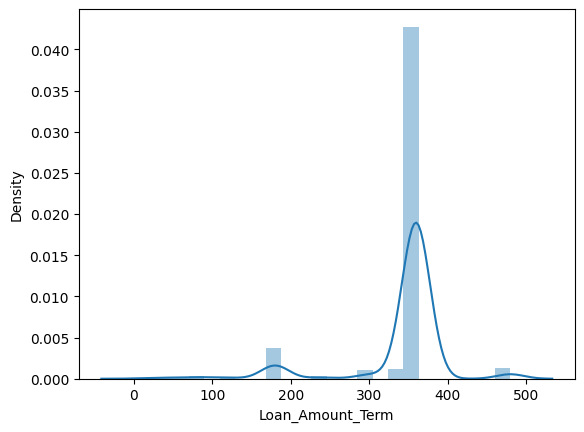

In [20]:
sns.distplot(df['Loan_Amount_Term'])

## Preprocessing

### Label Encoding

In [21]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df = df.drop(columns=['Loan_ID'], axis = 1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


### Log Transformation

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

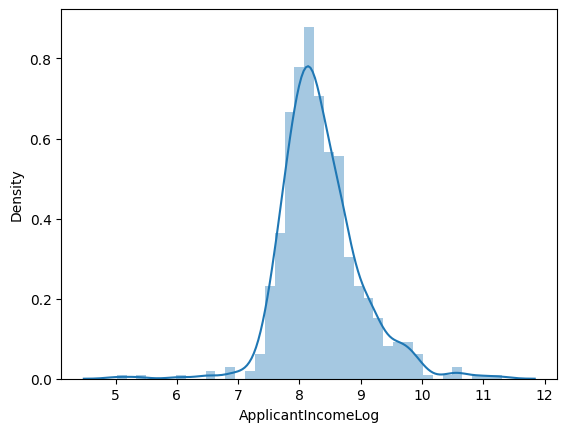

In [23]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

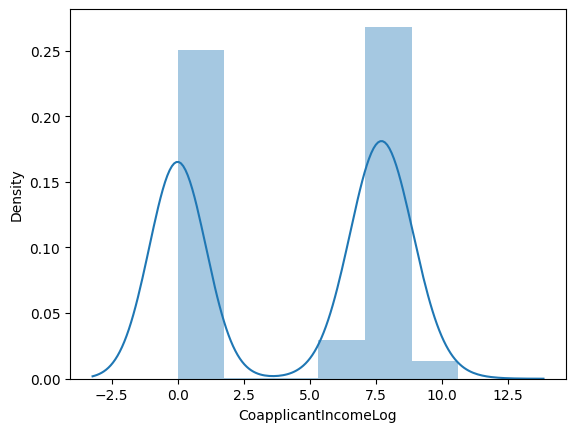

In [24]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

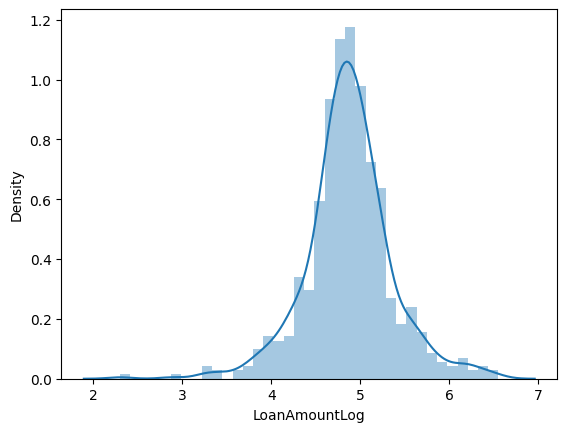

In [25]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

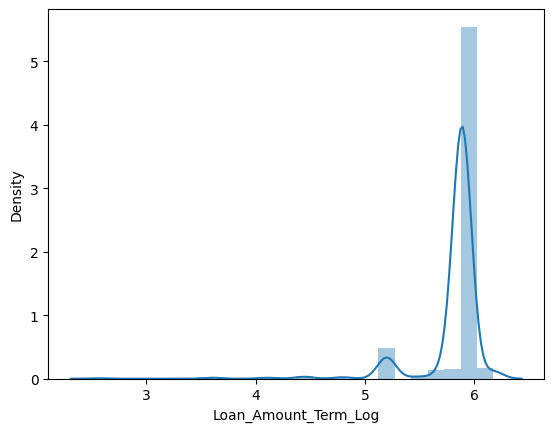

In [26]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

In [28]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,8.674197,0.000000,4.993232,5.888878,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,8.430327,7.319202,4.859812,5.888878,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,8.006701,0.000000,4.204693,5.888878,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,7.857094,7.765993,4.795791,5.888878,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,8.699681,0.000000,4.955827,5.888878,6000.0


<Axes: xlabel='Total_Income_Log', ylabel='Density'>

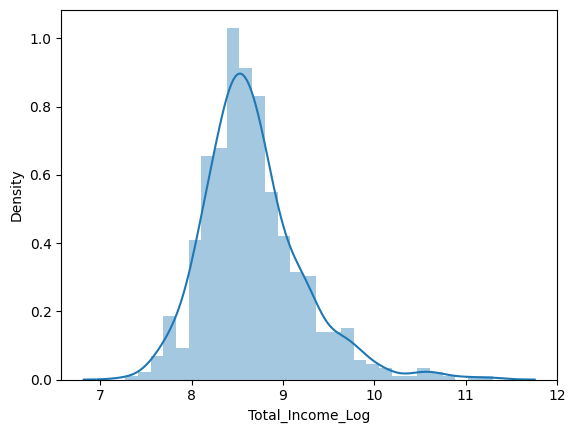

In [29]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

### Feature Engineering

In [ ]:
# Correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

In [ ]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

In [ ]:
# Seperating features and target
X = df.drop(columns = 'Loan_Status', axis = 1)
y = df['Loan_Status']

In [ ]:
# Splitting data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

## Model Selection

In [ ]:
models = {
    'knn': KNeighborsClassifier(),
    'logistic_regression': LogisticRegression(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'random_forest': RandomForestClassifier(),
    'decision_tree': DecisionTreeClassifier(),
    'extra_tree': ExtraTreesClassifier()
}

In [ ]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}


In [ ]:
for model_name, model in models.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    y_pred = cross_val_predict(model, X_train, y_train, cv=kf)
    
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    
# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

print(results_df)

## Model Training

In [ ]:
steps = [("imputer", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__C": np.linspace(0.001, 1.0, 20)}

tuning = GridSearchCV(pipeline, param_grid = params, cv = 5)
tuning.fit(X_train, y_train)

# Compute and print performance
print(f"Tuned Logistic Regression Parameters: {tuning.best_params_}, Accuracy: {tuning.score(X_test, y_test)}.")

best_model = tuning.best_estimator_

## Model Evaluation

In [ ]:
pred_training_data = best_model.predict(X_train)
accuracy_training_data = accuracy_score(pred_training_data, y_train)
accuracy_training_data

In [ ]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## Save the Model

In [ ]:
import joblib

In [ ]:
# Save the model
joblib.dump(best_model, 'loan_pred')